# K-Nearest Neighbors (KNN) Algorithm

K-Nearest Neighbors (KNN) is a simple, yet powerful supervised machine learning algorithm used for classification and regression tasks. Here are the basics behind KNN:

## How KNN Works

1. **Training Phase**: 
    - KNN does not have an explicit training phase. It simply stores the training data.

2. **Prediction Phase**:
    - When a new data point needs to be classified or a value needs to be predicted, KNN calculates the distance between the new data point and all the points in the training data.
    - The distance can be calculated using various metrics such as Euclidean distance, Manhattan distance, or Minkowski distance.

In this notebook we will consider the Euclidean distance function: 

$$d(p, q) = \sqrt{(p-q)^T(p-q)}$$

3. **Selecting Neighbors**:
    - The algorithm selects the 'k' closest data points (neighbors) to the new data point based on the calculated distances.

4. **Making Predictions**:
    - **Classification**: The class of the new data point is determined by the majority class among the 'k' neighbors.
    - **Regression**: The value of the new data point is determined by averaging the values of the 'k' neighbors.

## Key Parameters

- **k**: The number of neighbors to consider. Choosing the right value of 'k' is crucial for the performance of the algorithm.
- **Distance Metric**: The method used to calculate the distance between data points.

## Advantages

- Simple and relatively easy to implement.
- No training phase, making it fast for small datasets.
- Can be used for both classification and regression tasks.

## Disadvantages

- Computationally expensive for large datasets as it requires calculating the distance to all training data points.
- Sensitive to the choice of 'k' and the distance metric. (Here, we use k-3).
- Performance can be affected by irrelevant or redundant features.

## Read & Clean the Data

As per usual, we will put our data in a dataframe. 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Step 1: Define the file path
file_path = 'seeds_dataset.txt'  # Replace with your actual file name

# Step 2: Define column names
column_names = [
    'area',  # Replace with actual feature names if available
    'perimeter',
    'compactness',
    'kernel length',
    'kernel width',
    'asymmetry coefficient',
    'kernel groove length',
    'Label'      # Last column as label
]

# Step 3: Load the data
try:
    df = pd.read_csv(
        file_path,
        delim_whitespace=True,      # Handle any whitespace as delimiter
        header=None,                # No header in the file
        names=column_names,         # Assign column names
        na_values=['', ' ', 'NA', 'nan'],  # Treat these as NaN
        engine='python'             # Use Python engine for flexibility
    )
except Exception as e:
    print(f"Error reading the file: {e}")

# Step 4: Inspect the data
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Step 5: Handle missing values
# Remove rows with missing values
df_clean = df.dropna()
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_clean.shape}")


# Step 6: Convert labels to categorical (optional)
df_clean['Label'] = df_clean['Label'].astype('category')

print("\nData Types After Conversion:")
print(df_clean.dtypes)

print("\nUnique Labels:")
print(df_clean['Label'].unique())

print(f"shape of the cleaned DataFrame: {df_clean.shape}")

# Define label mapping
label_mapping = {
    1: 'Kama',
    2: 'Rosa',
    3: 'Canadian'
}

# Map numerical labels to categorical names
df_clean['Wheat_Variety'] = df_clean['Label'].map(label_mapping)

# Drop the original numerical label if desired
df_clean = df_clean.drop('Label', axis=1)

# Display the first few rows to verify
print("\nFirst 5 rows after label mapping:")
print(df_clean.head())

First 5 rows of the DataFrame:
    area  perimeter  compactness  kernel length  kernel width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   asymmetry coefficient  kernel groove length  Label  
0                  2.221                 5.220      1  
1                  1.018                 4.956      1  
2                  2.699                 4.825      1  
3                  2.259                 4.805      1  
4                  1.355                 5.175      1  

Missing Values in Each Column:
area                     0
perimeter                0
compactness              0
kernel length            0
kernel width             0
asymmetry coefficient    0
kernel groove length     0
Label                

## Implement K Nearest Neighbors Class

Whew, we cleaned the data. *(I hate .txt files)*

The labels correspond to the following species: 

- #1 - Karma
- #2 - Rosa
- #3 - Canadia

Now, let's graph our data. We will graph the area vs compactness for the kernels on the 2D plane and label them according to their type.

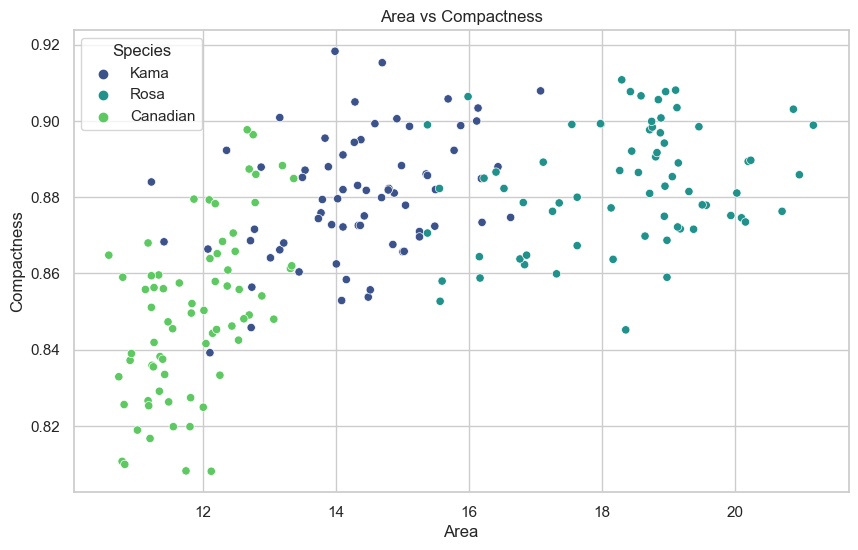

In [162]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='area', y='compactness', hue='Wheat_Variety', palette='viridis')
plt.title('Area vs Compactness')
plt.xlabel('Area')
plt.ylabel('Compactness')
plt.legend(title='Species')
plt.show()

## K Nearest Neighbors Model

Looks workable. Let's generate a class for our K nearest neighbors learning. We will need:

In [163]:
import numpy as np
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [164]:
# Select features and label
X = df_clean[['compactness', 'area']].values  # Features
y = df_clean['Wheat_Variety'].values         # Labels

print("\nFeature matrix (first 5 rows):")
print(X[:5])

print("\nLabels (first 5):")
print(y[:5])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("\nScaled Feature matrix (first 5 rows):")
print(X_scaled[:5])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Step 7: Instantiate and fit KNN
k = 3
knn = KNearestNeighbors(k=k)
knn.fit(X_train, y_train)

# Step 8: Predict on test set
y_pred = knn.predict(X_test)

# print("\nSample Predictions vs True Labels:")
# for true, pred in zip(y_test[:10], y_pred[:10]):
#     print(f"True: {true}, Predicted: {pred}")




Feature matrix (first 5 rows):
[[ 0.871  15.26  ]
 [ 0.8811 14.88  ]
 [ 0.905  14.29  ]
 [ 0.8955 13.84  ]
 [ 0.9034 16.14  ]]

Labels (first 5):
['Kama', 'Kama', 'Kama', 'Kama', 'Kama']
Categories (3, object): ['Kama', 'Rosa', 'Canadian']

Scaled Feature matrix (first 5 rows):
[[ 6.06017918e-05  1.42097769e-01]
 [ 4.28515270e-01  1.11880257e-02]
 [ 1.44238325e+00 -1.92066576e-01]
 [ 1.03938133e+00 -3.47091272e-01]
 [ 1.37450924e+00  4.45257175e-01]]

Training set size: 168
Testing set size: 42


## Confusion Matrix

To grasp how accurate our model is, we can generate a 3x3 confusion matrix for the feature classification. We will use the sklearn.metrics package to display this in a pretty way.

Total Accuracy of the Model: 0.81


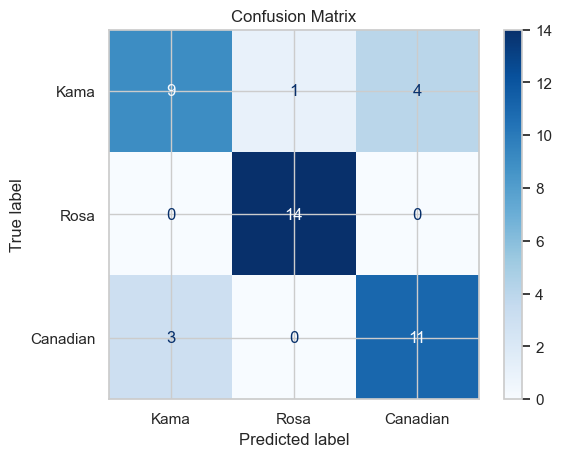

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

# Calculate the total accuracy
total_accuracy = accuracy_score(y_test, y_pred)
print(f"Total Accuracy of the Model: {total_accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Kama', 'Rosa', 'Canadian'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kama', 'Rosa', 'Canadian'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Looks like we got pretty good accuracy. The Rosa is able to be identified correctly more than the other two. This makes sense because there's not much overlap with the other species of wheat in the area vs compactness data. 

## Add more features

Now, let's add all the other features and see if our model gets more accurate.

Total Accuracy of the Model: 0.88


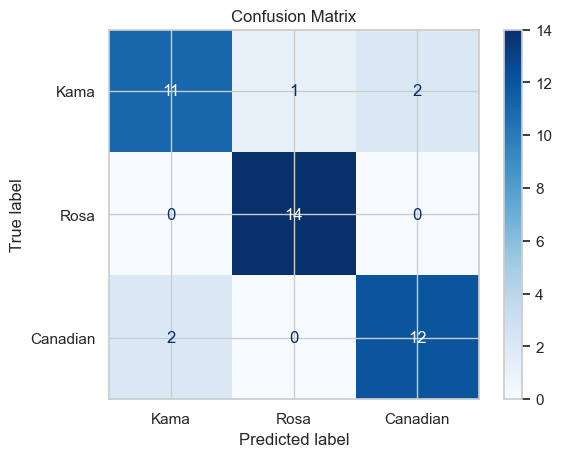

In [166]:
#  Select all feature columns
feature_columns = ['area', 'perimeter', 'compactness', 'kernel length', 
                  'kernel width', 'asymmetry coefficient', 'kernel groove length']
X = df_clean[feature_columns].values  # Features

# Select the label column
y = df_clean['Wheat_Variety'].values  # Labels

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


# Split the data (80% training, 20% testing)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Instantiate the KNearestNeighbors class
knn2 = KNearestNeighbors(k=k)

# Fit the model to the training data
knn2.fit(X_train_all, y_train_all)

# Predict on the testing set
y_pred_all = knn2.predict(X_test_all)

# Calculate the total accuracy
total_accuracy_all = accuracy_score(y_test_all, y_pred_all)
print(f"Total Accuracy of the Model: {total_accuracy_all:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test_all, y_pred_all, labels=['Kama', 'Rosa', 'Canadian'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kama', 'Rosa', 'Canadian'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

We get a pretty good accuracy $\approx 88\%$. That makes sense; Our model performs better when more features are introduced.